ADF Statistic: -1.3583317659818999
p-value: 0.6020814791099096
Performing stepwise search to minimize aic


d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_for

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=330.418, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=332.351, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=332.350, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=329.907, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=334.347, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.354 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -163.953
Date:                Mon, 27 Jan 2025   AIC                            329.907
Time:                        16:27:57   BIC                            332.276
Sample:                    01-01-2020   HQIC                           330.856
                         - 03-20-2020                          

d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_for

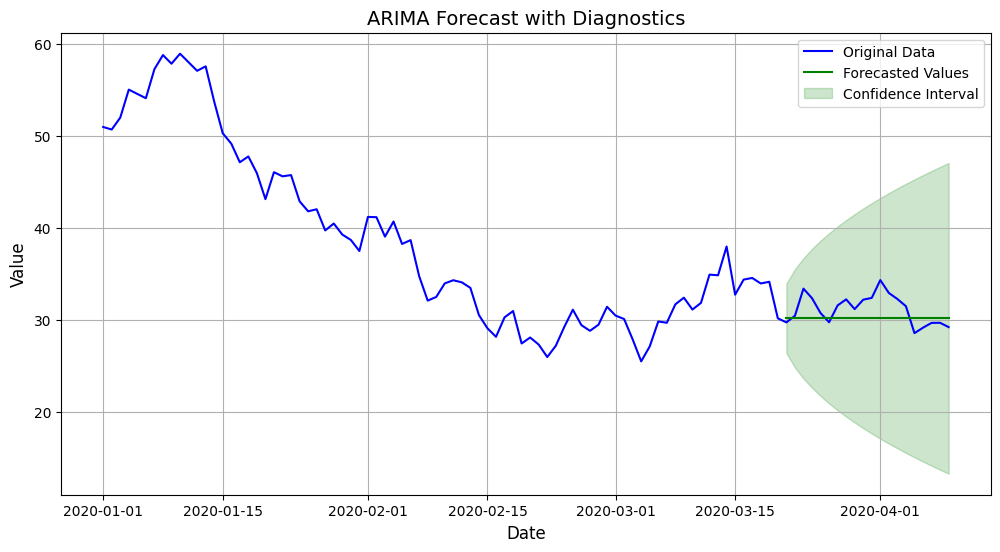

In [3]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Generate synthetic data with trend and noise
np.random.seed(42)
date_range = pd.date_range(start="2020-01-01", periods=100, freq="D")
data = pd.Series(50 + np.cumsum(np.random.randn(100) * 2), index=date_range, name="value")

# ADF Test to check stationarity
adf_test = adfuller(data)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Train-test split
train = data[:80]
test = data[80:]

# Fit ARIMA model
model = auto_arima(
    train,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

# Model summary
print(model.summary())

# Forecast
forecast_values, conf_int = model.predict(n_periods=20, return_conf_int=True)

# Prepare data for plotting
forecast_df = pd.DataFrame({
    "date": test.index,
    "forecasted": forecast_values,
    "lower_bound": conf_int[:, 0],
    "upper_bound": conf_int[:, 1]
})

# Plotting the results
plt.figure(figsize=(12, 6))

# Original data
plt.plot(data.index, data, label="Original Data", color="blue")

# Forecasted values
plt.plot(forecast_df["date"], forecast_df["forecasted"], label="Forecasted Values", color="green")
plt.fill_between(forecast_df["date"], forecast_df["lower_bound"], forecast_df["upper_bound"], color="green", alpha=0.2, label="Confidence Interval")

# Add labels, legend, and title
plt.title("ARIMA Forecast with Diagnostics", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid()

plt.show()


d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_for

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=647.304, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=737.805, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=695.067, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=643.844, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=735.809, Time=0.01 sec


d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=641.898, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=643.848, Time=0.10 sec


d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=645.824, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=642.706, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=642.477, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=693.451, Time=0.02 sec


d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=644.404, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=640.374, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=642.338, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=642.335, Time=0.04 sec


d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=644.322, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=641.136, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=640.888, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=691.468, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[12]             : AIC=642.897, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 1.746 seconds


d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\

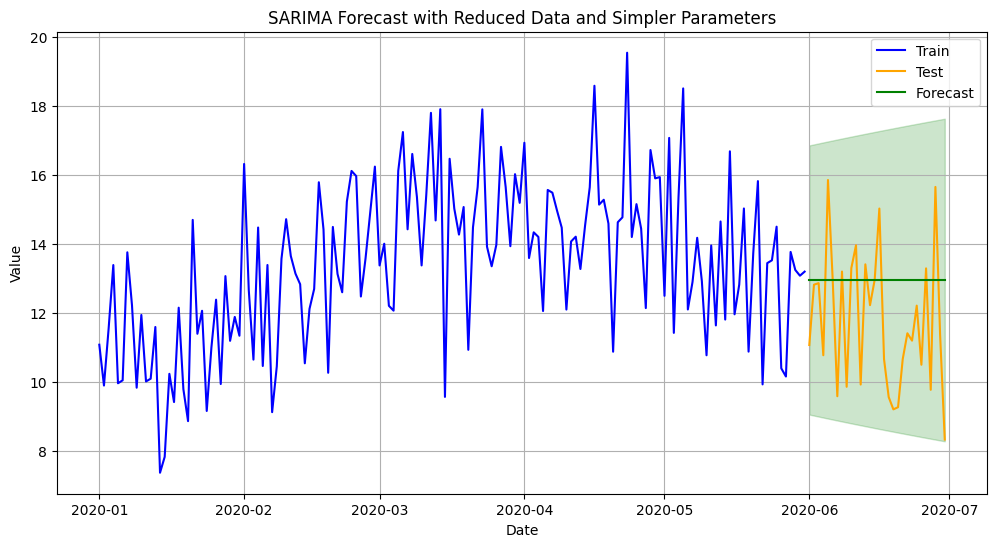

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Generate random seasonal data for a smaller dataset
np.random.seed(42)
date_range = pd.date_range(start="2020-01-01", end="2020-06-30", freq="D")  # 6 months instead of 2 years
seasonal_pattern = 10 + 5 * np.sin(2 * np.pi * date_range.dayofyear / 365)
random_noise = np.random.normal(0, 2, len(date_range))
data_values = seasonal_pattern + random_noise

# Create a DataFrame
data = pd.DataFrame({"date": date_range, "value": data_values})
data.set_index("date", inplace=True)

# Split the data into training and testing sets
train = data.loc[:'2020-05-31']
test = data.loc['2020-06-01':]

# Automatically find the best SARIMA parameters (limit search space)
sarima_model = auto_arima(
    train["value"],
    seasonal=True,
    m=12,  # Seasonal period for monthly seasonality
    trace=True,
    suppress_warnings=True,
    stepwise=True,
    random_state=42,
    max_p=2,  # Reduce maximum p to limit complexity
    max_q=2,  # Reduce maximum q to limit complexity
    max_order=4  # Limit the total number of parameters in the model
)

# Fit the SARIMA model
fitted_model = SARIMAX(
    train["value"],
    order=sarima_model.order,
    seasonal_order=sarima_model.seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

# Forecast the test period
forecast = fitted_model.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train["value"], label="Train", color="blue")
plt.plot(test.index, test["value"], label="Test", color="orange")
plt.plot(test.index, forecast_values, label="Forecast", color="green")
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="green", alpha=0.2)
plt.title("SARIMA Forecast with Reduced Data and Simpler Parameters")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


In [10]:
import pandas as pd
import numpy as np
import aqi
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from typing import Tuple, Dict

class ARIMAForecaster:
    def __init__(self, data_path: str):
        self.data_path = data_path
        self.raw_data = pd.read_csv(data_path)
        self.processed_data = None
        self.model = None
        self.forecast_df = None

    def _clean_data(self) -> pd.DataFrame:
        """Data cleaning pipeline"""
        df = self.raw_data.copy()
        
        # Clean column names
        df.columns = df.columns.str.strip()
        
        # Handle dates
        if 'date' not in df.columns:
            raise ValueError("Data must contain 'date' column")
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        
        # Convert numeric columns
        numeric_cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'aqi']
        for col in numeric_cols:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
        
        return df.sort_values('date').reset_index(drop=True)

    def _calculate_aqi(self, row: pd.Series) -> float:
        """Calculate AQI using python-aqi library with error handling"""
        pollutants = {
            'pm25': aqi.POLLUTANT_PM25,
            'pm10': aqi.POLLUTANT_PM10,
            'o3': aqi.POLLUTANT_O3_8H,
            'no2': aqi.POLLUTANT_NO2_1H,
            'so2': aqi.POLLUTANT_SO2_1H,
            'co': aqi.POLLUTANT_CO_8H
        }
        
        try:
            input_pairs = []
            for pol, code in pollutants.items():
                if pol in row and not pd.isna(row[pol]):
                    input_pairs.append((code, row[pol]))
            
            return aqi.to_aqi(input_pairs, algo=aqi.ALGO_MEP) if input_pairs else np.nan
        except (ValueError, KeyError) as e:
            print(f"Error calculating AQI: {e}")
            return np.nan

    def process_data(self) -> None:
        """Full data processing pipeline"""
        # Clean and prepare data
        df = self._clean_data()
        
        # Calculate AQI if not present
        if 'aqi' not in df.columns:
            df['aqi'] = df.apply(self._calculate_aqi, axis=1)
        
        # Handle missing values
        df['aqi'] = df['aqi'].interpolate(method='time').ffill().bfill()
        
        # Format for statsforecast
        self.processed_data = (df[['date', 'aqi']]
                               .rename(columns={'date': 'ds', 'aqi': 'y'})
                               .assign(unique_id='1'))
        
    def train_model(self, test_size: float = 0.2) -> Dict[str, float]:
        """Train AutoARIMA model with validation"""
        if self.processed_data is None:
            raise ValueError("Run process_data() first")
            
        # Split data
        split_idx = int(len(self.processed_data) * (1 - test_size))
        train = self.processed_data.iloc[:split_idx]
        test = self.processed_data.iloc[split_idx:]
        
        # Initialize and fit model
        self.model = StatsForecast(
            models=[AutoARIMA(season_length=1)],
            freq='D',
            n_jobs=-1
        )
        self.model.fit(train)
        
        # Validate
        h = len(test)
        forecast = self.model.predict(h=h, level=[95])
        
        # Calculate metrics
        test = test.set_index('ds')
        metrics = {
            'mae': mean_absolute_error(test['y'], forecast['AutoARIMA']),
            'rmse': sqrt(mean_squared_error(test['y'], forecast['AutoARIMA'])),
            'mape': np.mean(np.abs((test['y'] - forecast['AutoARIMA']) / test['y'])) * 100
        }
        
        return metrics

    def forecast(self, steps: int = 30, confidence_level: float = 0.95) -> pd.DataFrame:
        """Generate forecasts with confidence intervals"""
        if self.model is None:
            raise ValueError("Train model first")
            
        level = int(confidence_level * 100)
        forecast = self.model.predict(h=steps, level=[level])
        
        self.forecast_df = (forecast.reset_index()
                              .rename(columns={
                                  'ds': 'date',
                                  'AutoARIMA': 'forecast',
                                  f'AutoARIMA-lo-{level}': 'lower_bound',
                                  f'AutoARIMA-hi-{level}': 'upper_bound'
                              })
                              .set_index('date'))
        
        return self.forecast_df

    def plot_forecast(self) -> plt.Figure:
        """Visualize historical data and forecast"""
        if self.forecast_df is None:
            raise ValueError("Generate forecast first")
            
        plt.figure(figsize=(12, 6))
        plt.plot(self.processed_data['ds'], self.processed_data['y'], label='Historical AQI')
        plt.plot(self.forecast_df.index, self.forecast_df['forecast'], label='Forecast', linestyle='--')
        plt.fill_between(
            self.forecast_df.index,
            self.forecast_df['lower_bound'],
            self.forecast_df['upper_bound'],
            color='gray',
            alpha=0.2
        )
        plt.title('AQI Forecast with AutoARIMA')
        plt.xlabel('Date')
        plt.ylabel('AQI')
        plt.legend()
        plt.grid(True)
        return plt

# Usage Example
if __name__ == "__main__":
    data_path = r'backend\data\bangkok-air-quality_raw.csv' 
    forecaster = ARIMAForecaster(data_path)
    
    # Data processing
    forecaster.process_data()
    
    # Model training with validation
    metrics = forecaster.train_model()
    print(f"Model Performance:\nMAE: {metrics['mae']:.2f}, RMSE: {metrics['rmse']:.2f}, MAPE: {metrics['mape']:.2f}%")
    
    # Generate and visualize forecast
    forecast = forecaster.forecast()
    print(forecast)
    fig = forecaster.plot_forecast()
    fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'backend\\data\\bangkok-air-quality_raw.csv'